<div style="display: flex; align-items: center; justify-content: center; text-align: center;">
  <img src="https://coursereport-s3-production.global.ssl.fastly.net/uploads/school/logo/219/original/CT_LOGO_NEW.jpg" width="100" style="margin-right: 10px;">
  <div>
    <h1><b>Lessons 04: Exploring Pandas: Intermediate Skills</b></h1>
  </div>
</div>
<br>

> In this lesson, we'll explore various datasets and cover essential concepts like dividing, combining, and applying operations to data. We'll also address how to handle missing values effectively and discuss methods for merging and combining different datasets. This practical session aims to equip you with the skills needed to manipulate and analyze diverse datasets confidently.

---

# <span style="color:#D34B47">📌 Reviewing Previous Concepts</span>

In [1]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



## <span style="color:#4CCFA2">UFO Dataset 🛸</span>

## Read in the Data

In [2]:

ufo = pd.read_csv('/Users/woodzsan/Desktop/Machine Learning and Data Analysis/Coding Temple/6 - Python For Data Analysis/Lesson/Coding-Temple-M6-More-Pandas/data/ufo.csv')

## Look at the data

In [3]:

# Display the first few rows of the DataFrame
ufo.head()


,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [4]:

# Check the shape of the DataFrame
print("Shape of the UFO dataset:", ufo.shape)


Shape of the UFO dataset: (80543, 5)


In [5]:

# Display information about the DataFrame
ufo.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80543 entries, 0 to 80542
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   City             80492 non-null  object
 1   Colors Reported  17034 non-null  object
 2   Shape Reported   72141 non-null  object
 3   State            80543 non-null  object
 4   Time             80543 non-null  object
dtypes: object(5)
memory usage: 3.1+ MB


In [6]:

# Check for missing values
ufo.isnull().sum()


City                  51
Colors Reported    63509
Shape Reported      8402
State                  0
Time                   0
dtype: int64

In [7]:

# Display summary statistics of numerical columns
ufo.describe()


,City,Colors Reported,Shape Reported,State,Time
count,80492,17034,72141,80543,80543
unique,13503,31,27,52,68901
top,Seattle,ORANGE,LIGHT,CA,7/4/2014 22:00
freq,646,5216,16332,10743,45


In [8]:

# Display unique values in the 'shape' column
print("Unique shapes reported:", ufo['Shape Reported'].unique())


Unique shapes reported: ['TRIANGLE' 'OTHER' 'OVAL' 'DISK' 'LIGHT' 'CIRCLE' 'CIGAR' 'CYLINDER'
 'FIREBALL' 'SPHERE' nan 'RECTANGLE' 'FORMATION' 'FLASH' 'CHEVRON' 'EGG'
 'CONE' 'DIAMOND' 'VARIOUS' 'TEARDROP' 'CROSS' 'DELTA' 'ROUND' 'DOME'
 'PYRAMID' 'CRESCENT' 'FLARE' 'HEXAGON']


In [9]:

# Display the most common UFO sightings by state
print(ufo['State'].value_counts().head(10))


State
CA    10743
WA     4809
FL     4804
TX     4186
NY     3677
AZ     3019
PA     2986
IL     2957
OH     2783
MI     2347
Name: count, dtype: int64


In [10]:

# Convert 'datetime' column to datetime type
ufo['Time'] = pd.to_datetime(ufo['Time'])


In [11]:

# Extract year and month from the datetime column
ufo['year'] = ufo['Time'].dt.year
ufo['month'] = ufo['Time'].dt.month


In [12]:

# Display the number of sightings by year
print(ufo['year'].value_counts().sort_index())


year
1930       2
1931       2
1933       1
1934       1
1935       1
        ... 
2010    4154
2011    5089
2012    7263
2013    7003
2014    5382
Name: count, Length: 82, dtype: int64


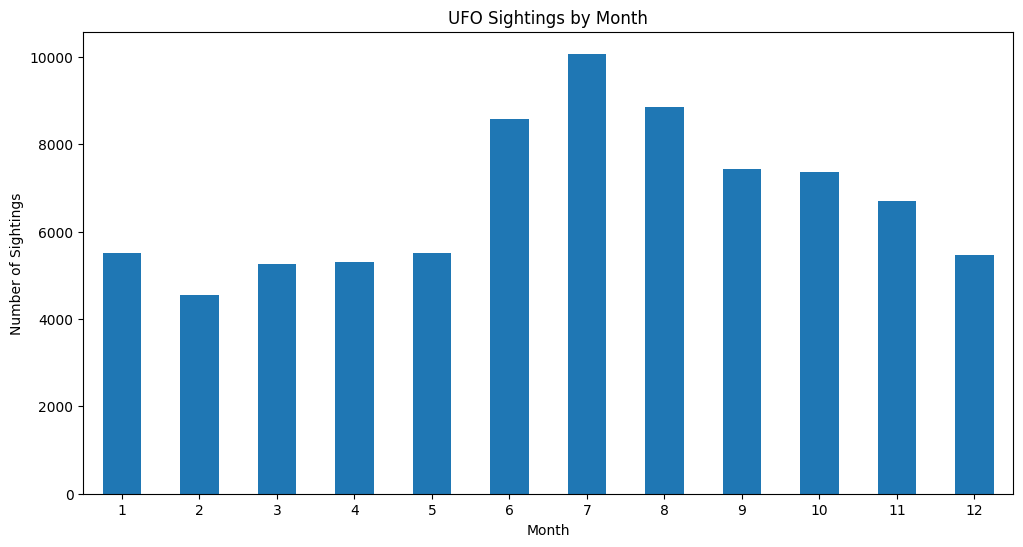

In [93]:

# Create a bar plot of sightings by month
plt.figure(figsize=(12, 6))
ufo['month'].value_counts().sort_index().plot(kind='bar')
plt.title('UFO Sightings by Month')
plt.xlabel('Month')
plt.xticks(rotation=0)
plt.ylabel('Number of Sightings')
plt.show()


## Deeper into the Data

Let's take a look at some value counts!

<Axes: xlabel='City'>

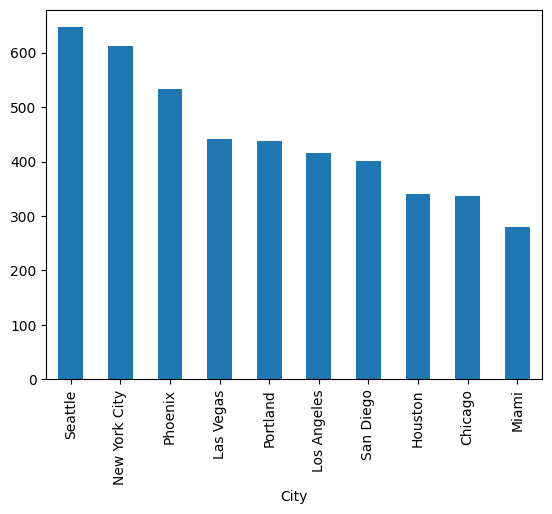

In [94]:
# City
ufo['City'].value_counts().head(10).plot(kind='bar')

In [96]:
# State
# ufo['State'].value_counts().head(10).plot(kind='bar')
ufo['State'].value_counts()

State
CA    10743
WA     4809
FL     4804
TX     4186
NY     3677
AZ     3019
PA     2986
IL     2957
OH     2783
MI     2347
NC     2156
OR     2111
MO     1806
CO     1717
NJ     1712
IN     1596
VA     1582
GA     1564
MA     1557
WI     1491
TN     1365
SC     1302
MN     1217
CT     1105
KY     1040
MD     1036
NV     1023
NM      931
OK      873
UT      823
AL      808
IA      799
AR      748
KS      739
ME      712
LA      699
ID      648
NH      618
MT      602
WV      559
MS      478
NE      461
HI      410
AK      403
VT      356
RI      331
WY      239
SD      234
DE      221
ND      155
Fl        4
Ca        1
Name: count, dtype: int64

In [99]:
# Hmm... Let's clean this up a bit
ufo['State'] = ufo['State'].str.upper()

In [100]:
# Let's check it again
ufo['State'].value_counts()

State
CA    10744
WA     4809
FL     4808
TX     4186
NY     3677
AZ     3019
PA     2986
IL     2957
OH     2783
MI     2347
NC     2156
OR     2111
MO     1806
CO     1717
NJ     1712
IN     1596
VA     1582
GA     1564
MA     1557
WI     1491
TN     1365
SC     1302
MN     1217
CT     1105
KY     1040
MD     1036
NV     1023
NM      931
OK      873
UT      823
AL      808
IA      799
AR      748
KS      739
ME      712
LA      699
ID      648
NH      618
MT      602
WV      559
MS      478
NE      461
HI      410
AK      403
VT      356
RI      331
WY      239
SD      234
DE      221
ND      155
Name: count, dtype: int64

In [102]:
# How many unique states?
ufo['State'].nunique()


50

In [103]:
# Shape Reported
ufo['Shape Reported'].value_counts()

Shape Reported
LIGHT        16332
TRIANGLE      7816
CIRCLE        7725
FIREBALL      6249
OTHER         5506
SPHERE        5231
DISK          5226
OVAL          3721
FORMATION     2405
CIGAR         1983
VARIOUS       1957
FLASH         1329
RECTANGLE     1295
CYLINDER      1252
DIAMOND       1152
CHEVRON        940
EGG            733
TEARDROP       723
CONE           310
CROSS          241
DELTA            7
ROUND            2
CRESCENT         2
DOME             1
PYRAMID          1
FLARE            1
HEXAGON          1
Name: count, dtype: int64

In [104]:
# Colors Reported
ufo['Colors Reported'].value_counts()

Colors Reported
ORANGE                          5216
RED                             4809
GREEN                           1897
BLUE                            1855
YELLOW                           842
RED ORANGE                       486
RED GREEN                        469
RED BLUE                         445
RED GREEN BLUE                   166
GREEN BLUE                       147
RED YELLOW                       146
ORANGE YELLOW                    137
ORANGE GREEN                      66
ORANGE BLUE                       58
YELLOW GREEN                      53
RED YELLOW BLUE                   36
RED YELLOW GREEN                  35
RED ORANGE YELLOW                 32
YELLOW BLUE                       27
RED YELLOW GREEN BLUE             26
RED ORANGE BLUE                   21
ORANGE GREEN BLUE                 13
YELLOW GREEN BLUE                 13
RED ORANGE GREEN                  12
RED ORANGE GREEN BLUE              8
ORANGE YELLOW GREEN                5
RED ORANGE YELLOW GREE

In [105]:
# ADVANCED - Is there a way to filter our dataframe to where the color includes orange?
ufo[ufo['Colors Reported'].str.contains('ORANGE', na=False)]

,City,Colors Reported,Shape Reported,State,Time,year,month
111,Tarrant City,ORANGE,CIRCLE,AL,1949-08-15 22:00:00,1949,8
138,Coeur d'Alene,ORANGE,CIGAR,ID,1950-07-02 13:00:00,1950,7
174,Greenville,ORANGE,TRIANGLE,TX,1952-04-15 16:00:00,1952,4
249,Artesia,ORANGE,OTHER,NM,1953-08-15 19:00:00,1953,8
311,Red Bank,ORANGE,CIRCLE,NJ,1954-12-15 23:10:00,1954,12
...,...,...,...,...,...,...,...
80469,Milford,ORANGE,CIRCLE,DE,2014-09-01 22:19:00,2014,9
80482,Spearfish,ORANGE,FIREBALL,SD,2014-09-02 22:30:00,2014,9
80489,Pleasure Island,ORANGE,SPHERE,NC,2014-09-03 05:00:00,2014,9
80503,Bethel Park,ORANGE,VARIOUS,PA,2014-09-03 21:15:00,2014,9


In [106]:
# Filter to UFO sightings to ones in Illinois
ufo[ufo['State'] == 'IL']


,City,Colors Reported,Shape Reported,State,Time,year,month
47,Oak Lawn,NaN,FORMATION,IL,1946-09-12 00:00:00,1946,9
72,Johnston City,NaN,DISK,IL,1947-07-09 20:00:00,1947,7
77,Keeneyville,NaN,FORMATION,IL,1947-07-15 12:00:00,1947,7
173,Chicago,NaN,DISK,IL,1952-04-15 13:00:00,1952,4
180,Chicago,NaN,CIRCLE,IL,1952-06-10 12:00:00,1952,6
...,...,...,...,...,...,...,...
80401,Belvidere,ORANGE,NaN,IL,2014-08-30 20:20:00,2014,8
80498,Highland Park,NaN,LIGHT,IL,2014-09-03 20:26:00,2014,9
80500,Johnsburg,RED BLUE,LIGHT,IL,2014-09-03 21:00:00,2014,9
80519,Glen Ellyn,RED,CIRCLE,IL,2014-09-04 20:20:00,2014,9


In [27]:
# (NOW YOU): Show me all the UFO sightings in your town! (City and State)
# Anything interesting?


In [28]:
# Quick look at dtypes


---

# <span style="color:#D34B47">📌 Working with Datetime in Python</span>

In [29]:
# Convert `Time` to datetime!



In [30]:
# Engineer some new features!


---

# <span style="color:#D34B47">📌 Introduce Diamonds Dataset</span>

## <span style="color:#4CCFA2">Diamonds Dataset 💍</span>

## Read in the Data

In [108]:

diamond = pd.read_csv('/Users/woodzsan/Desktop/Machine Learning and Data Analysis/Coding Temple/6 - Python For Data Analysis/Lesson/Coding-Temple-M6-More-Pandas/data/diamonds.csv')

## First Look at the Data

You can view the data dictionary [here](https://www.kaggle.com/datasets/shivam2503/diamonds).

In [109]:
# Hmm... rename some columns?
diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [33]:
# check our change


In [34]:
# shape


In [35]:
# info


In [36]:
# another look at missing values


In [37]:
# describe


In [38]:
# decribe again (on object columns)


## Deeper into the Data

In [39]:
# Let's count up the cuts


In [40]:
# Let's do the same thing, but normalized


In [41]:
# clarity


In [42]:
# color


## Sorting

In [43]:
# We can sort individual Series...


In [44]:
# Or the entire DataFrame


---

# <span style="color:#D34B47">📌 Understanding Split-Apply-Combine in Pandas</span>

What if we want summary statistics _with respect to some categorical variable?_ For example, the price of a diamond probably varies widely between different diamond cuts. To tackle this problem, we'll use the **Split-Apply-Combine** technique.

* **Split**: Separate your data into different DataFrames, one for each category.
* **Apply**: On each split-up DataFrame, apply some function or transformation (for example, the mean).
* **Combine**: Take the results and combine the split-up DataFrames back into one aggregate DataFrame.

This might sound complicated, but it's actually only two commands in pandas (the **Combine** step is done for us).

In [45]:
# What is the mean price by diamond cut?


In [46]:
# Can we just describe each price by cut?


In [47]:
# What if I want my own recipe of statistics?



In [48]:
# Now you! - What is the average price for each color?



In [49]:
# Now you! - What is the median price for each clarity?



In [50]:
# Can we group by more than one column?



# ⏸️ PAUSE - The next lesson will continue in this notebook!

---

<div>
<img src="https://coursereport-s3-production.global.ssl.fastly.net/uploads/school/logo/219/original/CT_LOGO_NEW.jpg" width=60>
</div>

# **Lesson 05. Exploring Pandas: Mastering the Toolkit**

# <span style="color:#D34B47">📌 Reviewing Previous Concepts</span>

## <span style="color:#4CCFA2">Ames Iowa Housing Dataset 🏡</span>


In this dataset, we will go over some common data types that you will see in pandas as well as learn how to deal with missing values.


## Read in the Data

## First Look at the Data

You can view the data dictionary [here](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data).

In [51]:
# shape


In [52]:
# info


---

# <span style="color:#D34B47">📌 Data Types</span>

What are the most common data types that you will see in pandas?

- int64 (integer)
- float64 (floating point number)
- object (string)
- datetime (datetime)
- bool (true or false)


We can convert a column of one type into another using the [astype](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html) function.

In [53]:
# Convert the SalePrice column into float64 data type



In [54]:
# Did we make that change?



In [55]:
# You might be asking yourself... is there a way to remove the elipses? I want to see everything!



In [56]:
# Let's try it again


---

# <span style="color:#D34B47">📌 Missing Values</span>

## Locating Missing Values

In [57]:
# Another look at missing values


This is sometimes difficult to see when we have too many columns. One of my favourite ways to visualize null values is via the `missingno.bar` function.

In [58]:
# install missingno library
# ! pip install missingno

In [59]:
# Import missingno library


In [60]:
# missingno bar


In [61]:
# missingno matrix


In [62]:
# missingo heatmap?


## Dealing with Missing Values

There are mainly two ways to deal with missing data.

1. Drop the rows or columns which contain missing data 
2. Replace missing data with substituted values also known as imputation

Both methods have their own individual pros and cons. Which of the two methods you use will be highly dependent on your data as well as the nature of the problem you are trying to solve. If you are working on detailed piece of analysis, this is where you would take the time to really understand each column to figure out the best strategy to handle those missing values.

Generally speaking, dropping data is much easier and straightforward to implement but it does come at the expense of removing potentially useful information from our dataset. This will adversely affect model performance which then leads to inaccurate model predictions.

On the other hand, choosing the best way to impute or replace those missing values require more time, consideration and experience. I will briefly touch upon the different ways to impute missing values in the later part of this notebook.

### Method 1: Drop Rows or Columns with Missing Values

If you are in a hurry or don't have a reason to figure out why your values are missing, one option is to remove rows or columns that contain missing values. However, this is not the best approach in most cases because we might lose potentially useful information in our dataset.

Let's see how we can drop rows and columns with missing values using the [dropna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html) function. 

In [63]:
# Drop rows with missing values



Yikes, it appears that we have dropped all the rows in our dataframe. This is not good. 

Ideally, we would only remove rows if we have a large number of training examples and if the rows with missing data is not a high number. In our example, all the rows have at least one missing feature therefore dropping rows with missing data is not a good strategy to use.

Maybe we should remove columns with missing values instead.

In [64]:
# Drop columns with missing values



We are dropping a substantial amount of features from our dataset, almost a quarter! 

Features in our example are the characteristics that describe the house. If we remove features that are significant in explaining the sale price of the house, our model will not be able to make accurate predictions. 

In an ideal scenario, it is only safe to drop a column if there is significant random missing data present in a column and if we have reasons to believe that the column is unimportant in predicting our target variable. 

Let's have a closer look at the features that we are dropping. 

To iterate, only drop rows and columns if you have significant amount missing data or that the data is not important in predicting the target variable. 

Now let's look at a better approach for dealing with missing data via imputation.

### Method 2: Filling in Missing Values

There are a couple of ways to impute missing data that is subjective to the situation. 

In this section, I will go through the two of the most common technique to fill missing data:

1. Using mean or median values (for numerical variables)
2. Using mode or 'Unknown' (for categorical variables)

Numerical variables are continuous random variable like height, age, total sales whereas categorical variables are discrete random variables like yes or no, pass or fail, small, medium or large etc.

The main function to use here is the [fillna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html) function. 

#### Part A. `LotFrontage`

In [65]:
# Suppose we want to fill missing data in the LotFrontage column 
# What datatype is it?



**When to Fill Null Values with Median or Mean?**

**Use Mean:**
- *When Data is Normally Distributed:* If your data follows a normal distribution, the mean is a good measure of central tendency. It accurately represents the "average" value and can be a reasonable choice for filling missing values.

- *When Outliers are Not a Concern:* The mean is sensitive to outliers. If your data has extreme values (outliers) that you want to minimize the impact of, using the mean might not be the best choice. In such cases, consider other measures like the median.

**Use Median:**
- *When Data has Skewed Distribution:* If your data is not symmetrically distributed and has a skew, the median is often a better measure of central tendency. It is less sensitive to extreme values and provides a robust estimate.

- *When Outliers are Present:* The median is not influenced by extreme values, making it a more suitable choice when outliers are a concern. It gives a better representation of the central tendency in the presence of skewed or heavily tailed distributions.

**Considerations for Both:**
- In some cases, the choice between mean and median may depend on the specific context of your analysis and the variable's meaning. For instance, in financial data, imputing with the mean might be appropriate.

- Always carefully assess your data and the goals of your analysis before deciding on an imputation strategy. It's often beneficial to try multiple imputation methods and compare.


In [66]:
# NEXT LESSON


In [67]:
# NEXT LESSON


In [68]:
# Let's take a quick peek



Row number 8 has missing value.

Suppose we want to fill all missing data in that column with the median.

In [69]:
# Compute median



In [70]:
# Impute missing data in LotFrontage with median


Row number 8 has been filled with the median of the LotFrontage column that is 69.

#### Part B. `GarageType`

Now let's look at an example of a categorical variable like GarageType.

In [71]:
# Check data type of GarageType column



In [72]:
# Let's see the value counts in that column including the null value



In [73]:
# Grab the mode


In [74]:
# Fill it in!


#### Part C. `GarageQual`

We can also fill the missing data with any number or text that we like. Let's consider the GarageQual feature.

Suppose we want to replace the null values with the word 'Unknown'.

In [75]:
# How would I save this dataframe?



---

# <span style="color:#D34B47">📌 Combining Datasets ⛙</span>

When working with multiple datasets during a project, there will come a point where you might wish to merge your dataframes together to have a better view and understanding of your data. 

In this last part of the lesson, we will cover two pandas functions, and they are [concat](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) and [merge](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html) that are used to combine dataframes.

## Concat

Concat is short for concatenate. This function allows to stack two separate dataframes both vertically and horizontally.

Let's observe this with an example.

In [76]:
df1 = pd.DataFrame({'Name': ['Vicky', 'Bill'], 'Age': [12, 46]})
df2 = pd.DataFrame({'Name': ['John', 'Sabrina'], 'Age': [37, 25]})

There is an argument called axis within the concat function that you can use to specify which way you would like to stack your dataframe. 1 means horizontal whereas 0 means vertical. If you do not specify, pandas assumes 0 as its default. 

You can also use the ignore index function if you would like a sequential index column in the new dataframe.

In [77]:
# Concat horizontally



In [78]:
# Concat vertically and ignore index



There is another argument called join which allows you to stack dataframes only based on the columns shared by two dataframes.

To demonstrate this, suppose we have a new dataframe with an extra column for hobby.

In [79]:
df4 = pd.DataFrame({'Name': ['Tyler', 'Natalie'], 'Age': [28, 39], 'Hobby': ['Swimming', 'Reading']})
df4

,Name,Age,Hobby
0,Tyler,28,Swimming
1,Natalie,39,Reading


In [80]:
# Outer is the default for the join argument



Outer does not consider any differences in columns between two dataframe. Because df3 does not have a hobby column, pandas will automatically fill them with null values.

In [81]:
# Inner stacks only the columns that are shared between the two dataframes



Because df3 does not have the hobby column, pandas will not show that column in the combined dataframe.

## Merge

To demonstrate the idea of merge, let's read in two ficticious datasets that I have created-- One for sales data and one for customer profile.

In [82]:
# customers head


In [83]:
# customers shape


In [84]:
# There are 100 unique customer ID which means that they are unique to each row



In [85]:
# sales head


In [86]:
# sales shape


In [87]:
# Date is not in order so sort data by date


In [88]:
# Select sales made by customer with customer ID number 1



In [89]:
# Merge the two dataframes together



In [90]:
print("Shape of sales data is: ", sales.shape)
print("Shape of customer data is: ", customers.shape)
print("Shape of the combined dataframe is: ", combined.shape)

NameError: name 'sales' is not defined

As we can see, merge has successfully joined the two dataframes together based on a shared column which is customer ID.

The combined dataframe has the same number of rows as the sales dataframe but with an additional column, customer lifestage which came from the customer dataframe.

Now, we are going to explore the how argument within the merge function which allows you to specify the direction in which you would like to merge your dataframes.

In [ ]:
size = pd.DataFrame({'Colour': ['Red', 'Blue', 'Green'], 'Size': ['M', 'S', 'M']})
gender = pd.DataFrame({'Colour': ['Red', 'Blue', 'Yellow'], 'Sex': ['Female', 'Female', 'Male']})

Inner and outer are very similar to what we have seen in the concat section earlier in this notebook.

In [ ]:
# Only show rows where there is a match in the column
# Red and blue are present in both dataframes



In [ ]:
# Show all the rows and fill rows with null values when there is no match
# There is no sex info on green colour and there is no size info on yellow colour



Left and right on the other hand allows you to specify which dataframe to keep when there is no matching rows.

In [ ]:
# Keep everything that is on the left dataframe which is df1 in this example
# Fill in sex info for rows that have matches with df2 and if there is none e.g. green colour, fill null value



In [ ]:
# Keep everything that is on the right dataframe which is df2 in this example
# Fill in size info for rows that have matches with df1 and if there is none e.g. yellow colour, fill null value



<details>
    <summary><h1>WE MADE IT! 🎉 </h1></summary>
  
  ![](https://media3.giphy.com/media/aUhEBE0T8XNHa/giphy.gif)

</details>
